# Minimax双対性の必要条件と十分条件について


参考
* [The Minimax Equality; Sufficient and Necessary Conditions](https://link.springer.com/article/10.1007/s10114-005-0836-6)

$X$と$Y$を空でない集合とし，関数$a: X \times Y \mapsto \mathbb{R}$を考えましょう．
次が成り立っている時，minimax双対性が成り立っているといいます：

$$
\sup _{x \in X} \inf _{y \in Y} a(x, y)=\inf _{y \in Y} \sup _{x \in X} a(x, y) .
$$

このノートブックでは，minimax双対性が成り立つ必要条件と十分条件について見ていきます．

任意の集合$S$について，$\sigma(S)=\left\{S^{\prime} \subset S|| S \mid<\infty\right\}$とします．これは$S$に含まれる$S$より小さい集合の集合です．
次は明らかにいつでも成り立ちます．

$$
\sup _{x \in X} \inf _{y \in Y} a(x, y) \leq\left\{\begin{array}{c}
\sup _{X^{\prime} \in \sigma(X)} \inf _{y \in Y} \max _{x \in X^{\prime}} a(x, y) \\
\inf _{Y^{\prime} \in \sigma(Y)} \sup _{x \in X} \min _{y \in Y^{\prime}} a(x, y)
\end{array} \leq \inf _{y \in Y} \sup _{x \in X} a(x, y) .\right.
$$

---

一応証明を考えてみます．

$$
\sup _{x \in X} \inf _{y \in Y} a(x, y) \leq
\sup _{X^{\prime} \in \sigma(X)} \inf _{y \in Y} \max _{x \in X^{\prime}} a(x, y)
$$

を証明しましょう．
まず，通常のweak dualityと同様にして，
$$\max_{x \in X'}\inf_{y \in Y} a(x, y) \leq \inf_{y \in Y}\max_{x \in X'}a(x, y)$$
です．
両辺に$\sup _{X^{\prime} \in \sigma(X)}$をつければ証明終わりです．

---


よって，minimax双対性は次の２つが成立するのと等価です：

$$
\begin{aligned}
& \sup _{X^{\prime} \in \sigma(X)} \inf _{y \in Y} \max _{x \in X^{\prime}} a(x, y) \leq(=) \sup _{x \in X} \inf _{y \in Y} a(x, y) \\
& \sup _{X^{\prime} \in \sigma(X)} \inf _{y \in Y} \max _{x \in X^{\prime}} a(x, y) \geq(=) \inf _{y \in Y} \sup _{x \in X} a(x, y) .
\end{aligned}
$$

この二個目を示すための必要十分条件を考えましょう．

表記：
* $x \in X$と$\alpha \in \mathbb{R}$について，$\bar{Y}_\alpha(x)=\{y \in Y \mid a(x, y) \leq \alpha\}$とします．つまり，$x$が与えられたときに，$\alpha$以下になる$y$の集合です．
* $X$の部分集合$X'$について，$\bar{Y}_\alpha\left(X^{\prime}\right) = \bigcap_{x \in X^{\prime}} \bar{Y}_\alpha(x)$とします．また，$\bar{Y}_\alpha(\emptyset)=Y$とします．
* $\underline{v}=\sup _{x \in X} \inf _{y \in Y} a(x, y)$および$\bar{v}=\inf _{y \in Y} \sup _{x \in X} a(x, y)$とします．


## ２つ目について

$\sup _{X^{\prime} \in \sigma(X)} \inf _{y \in Y} \max _{x \in X^{\prime}} a(x, y) \leq(=) \sup _{x \in X} \inf _{y \in Y} a(x, y)$が成立する必要十分条件が次になります．

$$
\alpha \in \mathbb{R}, \bar{Y}_\alpha\left(X^{\prime}\right) \neq \emptyset, \forall X^{\prime} \in \sigma(X) \Rightarrow \bar{Y}_\beta(X) \neq \emptyset, \forall \beta>\alpha
$$

例で見てみましょう．

---

**$a(x, y)=x^2 \cdot \log y$のとき**

* $a(x, y)=(x -2)^2 \cdot \log y$
* $X = [1, 3]$
* $Y = [1, 3]$

のときを考えます．
これは$x$について凸かつ$y$について凹なので，明らかにminimax定理がなりたちます．

---


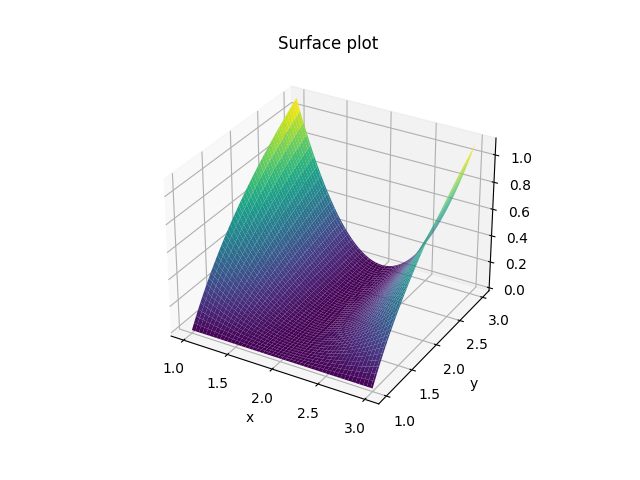

In [5]:
%matplotlib widget 

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# 関数aを描画してみます

x = np.outer(np.linspace(1, 3, 100), np.ones(100))
y = x.copy().T # transpose
z = lambda x, y: (x - 2) **2 * np.log(y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z(x, y),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [37]:
# Y_αを描画してみます

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

ys = np.linspace(1, 3, 100)
z = lambda x, y: (x - 2) **2 * np.log(y)


def plot(x, alpha):
    plt.figure(figsize=(8, 6))
    zs = z(x, ys)
    plt.plot(ys, zs)
    plt.hlines(alpha, 1.0, 3.0, colors="red", label=r"$\alpha$")

    Yalpha = ys[zs <= alpha]
    if len(Yalpha) > 0:
        xmin, xmax = Yalpha[0], Yalpha[-1]
    else:
        xmin, xmax = 1.0, 1.0

    plt.hlines(alpha, xmin, xmax, colors="green")
    plt.grid()
    plt.xlim(1.0, 3)
    plt.xlabel("y")
    plt.ylabel("z")
    plt.show()


interact(plot, x=(1.0, 3.0, 0.01), alpha=(np.log(0.5), np.log(4), 0.01))



interactive(children=(FloatSlider(value=2.0, description='x', max=3.0, min=1.0, step=0.01), FloatSlider(value=…

<function __main__.plot(x, alpha)>

## １つ目について

$\sup _{X^{\prime} \in \sigma(X)} \inf _{y \in Y} \max _{x \in X^{\prime}} a(x, y) \geq(=) \inf _{y \in Y} \sup _{x \in X} a(x, y)$の必要十分条件では，次の定義を利用します．

---

**weakly convexlike**

$Z$を空でない集合とします．
$\mathscr{F}$を$Z$上の実関数の集合とします．$t\in [0, 1]$とします．

* 次を満たすとき，$\mathscr{F}$は$Z$上でweakly $t$-convexlikeといいます：

$$
\forall z^1, z^2 \in Z, \inf _{z \in Z} \sup _{f \in \mathscr{F}} f(z) \leq \sup _{f \in \mathscr{F}}\left[t f\left(z^1\right)+(1-t) f\left(z^2\right)\right]
$$

* また，$-\mathscr{F}=\{-f \mid f \in \mathscr{F}\}$がweakly $t$-convexlikeのとき，$\mathscr{F}$をweakly $t$-concavelikeと呼びます．
* さらに，$t\in [0, 1]$の全てでweakly $t$-convexlikeなら，$\mathscr{F}$はweakly convexlike toiimasu.
* 

---

**$\alpha$-affine**

$f, g \in \mathscr{F}, t \in[0,1]$と $\alpha \in \mathbb{R}$について，

$$
Z_{\alpha, t}(f, g)=\{z \in Z \mid t f(z)+(1-t) g(z)<\alpha\}
$$
とします．
* 次を満たすとき，$\mathscr{F}$は$Z$上で$\alpha$-affine接続であると呼びます．
すべての$t\in [0, 1]$について，$Z_{\alpha, 1}(f, g) \cap Z_{\alpha, 0}(f, g)=\emptyset$であるならば，

$$
\emptyset \in\left\{Z_{\alpha, t}(f, g) \cap Z_{\alpha, 1}(f, g), Z_{\alpha, t}(f, g) \cap Z_{\alpha, 0}(f, g)\right\}
$$

---

この２つを使うと，次が１つ目の不等式と等価です：

* $\bar{Y}_\alpha\left(X^{\prime}\right) \neq \emptyset$, for all $X^{\prime} \in \sigma(X)$ whenever $\alpha>\underline{v}$
* 次の２つが成立：
    * $\forall X^{\prime} \in \sigma(X)$について，$(a(., y))_{y \in Y_\alpha\left(X^{\prime}\right)}$が$X$上でweakly concavelike
    * $\forall X^{\prime} \in \sigma(X)$について，$(a(x, .))_{x \in X}$が$Y_\alpha(X')$上で$\alpha$-affine接続
